In [1]:
from nltk.tokenize import sent_tokenize
from gensim.models import Word2Vec
import nltk
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
import glob
import os
from os import path
import string
import numpy
import re
from __future__ import absolute_import, division, print_function
import pandas as pd
import multiprocessing
import gensim
import random
from tqdm import tqdm
import pandas as pd
from gensim.models import KeyedVectors
from numpy import array
import matplotlib.pyplot as plt
import numpy as np

C:\ProgramData\Anaconda3\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


C:\ProgramData\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


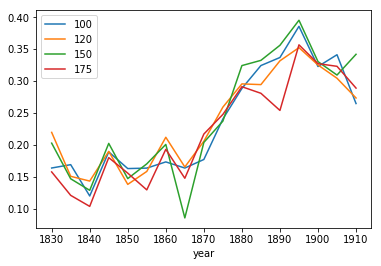

In [52]:
list_scores = dict()

for i in ["100", "120", "150", "175"]:
    dr = "D://Scriptie//Data//models//5yp_s" + i
    os.chdir(dr)
    list_mod = glob.glob('*.bin')
    
    model_version_list = list()
    
    for year in list(range(1830,1911,5)):
        
        mfn = [m for m in list_mod if int(m[0:4]) == year]
        model = KeyedVectors.load_word2vec_format(mfn[0], binary = True)
        
        tmp = model.similarity('buitenland', 'vaderland')
        model_version_list.append(tmp)
        
    list_scores.update({i:model_version_list})

dfr = pd.DataFrame(list_scores['100'], columns = ['100'])
dfr['120'] = pd.DataFrame(list_scores['120'])
dfr['150'] = pd.DataFrame(list_scores['150'])
dfr['175'] = pd.DataFrame(list_scores['175'])
dfr['year'] = list(range(1830,1911,5))
dfr.plot(x="year", y=["100", "120", "150", '175'], kind="line")

In [47]:
model.most_similar('verwikkelingen')

C:\ProgramData\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('verwikkeling', 0.7876595854759216),
 ('conflicten', 0.7155020236968994),
 ('beroeringen', 0.7029808759689331),
 ('moeielijkheden', 0.6876603960990906),
 ('troebelen', 0.6746363043785095),
 ('oneenigheden', 0.6691226363182068),
 ('moeilijkheden', 0.6653957962989807),
 ('crisis', 0.6634671092033386),
 ('onzekerheid', 0.6560318470001221),
 ('vredesonderhandelingen', 0.6534246206283569)]